# Day 53 - Building and Training CNNs for Image Classification in Python

Welcome to Day 53! Today we'll dive deep into the practical implementation of Convolutional Neural Networks (CNNs) for image classification. We'll build CNNs from scratch, train them on real image data, and visualize what our networks are learning.

## Introduction

Convolutional Neural Networks (CNNs) have revolutionized computer vision and image processing. From facial recognition to medical image analysis, CNNs power many of the AI applications we interact with daily. Unlike traditional neural networks that treat images as flat vectors, CNNs preserve the spatial structure of images, making them exceptionally powerful for visual tasks.

In previous lessons, you learned about the theoretical foundations of CNNs, including convolutional layers, pooling operations, and various architectural patterns. Today, we transition from theory to practice. You'll learn how to construct a CNN architecture, prepare image data, train your model, and evaluate its performance. By the end of this lesson, you'll have hands-on experience building CNNs that can classify images with high accuracy.

Image classification is one of the most fundamental tasks in computer vision. Given an input image, the goal is to assign it to one of several predefined categories. This seemingly simple task underpins countless applications: autonomous vehicles identifying pedestrians and traffic signs, medical systems detecting diseases from X-rays, and smartphones organizing your photo library by content.

### Learning Objectives

By the end of this lesson, you will be able to:

- Build complete CNN architectures using TensorFlow/Keras
- Prepare and preprocess image datasets for training
- Train CNN models and monitor their performance
- Evaluate trained models using appropriate metrics
- Visualize model predictions and learned features
- Understand the impact of different hyperparameters on CNN performance

## Theory: CNN Architecture for Image Classification

### The CNN Pipeline

A typical CNN for image classification consists of several key components arranged in sequence:

1. **Input Layer**: Receives the raw pixel values of images
2. **Convolutional Layers**: Extract features through learned filters
3. **Activation Functions**: Introduce non-linearity (typically ReLU)
4. **Pooling Layers**: Reduce spatial dimensions and provide translation invariance
5. **Flatten Layer**: Convert 2D feature maps to 1D vectors
6. **Dense (Fully Connected) Layers**: Learn complex patterns from extracted features
7. **Output Layer**: Produce class probabilities

### Mathematical Foundations

#### Convolution Operation

The core operation in CNNs is the convolution. For an input $X$ and filter (kernel) $W$, the convolution at position $(i,j)$ is:

$$
(X * W)_{i,j} = \sum_{m} \sum_{n} X_{i+m, j+n} \cdot W_{m,n}
$$

This operation slides the filter across the input, computing dot products at each position to create a feature map.

#### Activation Function (ReLU)

The Rectified Linear Unit (ReLU) is the most common activation function in CNNs:

$$
\text{ReLU}(x) = \max(0, x)
$$

ReLU introduces non-linearity while being computationally efficient and helping to mitigate the vanishing gradient problem.

#### Max Pooling

Max pooling reduces spatial dimensions by taking the maximum value in each pooling window:

$$
\text{MaxPool}(X)_{i,j} = \max_{m,n \in \text{window}} X_{i+m, j+n}
$$

This operation provides translation invariance and reduces computational complexity.

#### Softmax Output

For multi-class classification, the output layer uses softmax activation to convert logits to probabilities:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

where $K$ is the number of classes.

#### Cross-Entropy Loss

CNNs for classification are typically trained using categorical cross-entropy loss:

$$
L = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)
$$

where $y_i$ is the true label (one-hot encoded) and $\hat{y}_i$ is the predicted probability for class $i$.

### Why CNNs Excel at Image Classification

CNNs have three key properties that make them ideal for image processing:

1. **Local Connectivity**: Each neuron connects only to a local region of the input, capturing local patterns like edges and textures.
2. **Parameter Sharing**: The same filter is applied across the entire image, dramatically reducing the number of parameters compared to fully connected networks.
3. **Translation Invariance**: Through pooling and hierarchical feature learning, CNNs can recognize patterns regardless of their position in the image.

## Python Implementation

Let's build our CNN step by step. We'll use the MNIST dataset of handwritten digits, a classic benchmark for image classification.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras for building CNNs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

2025-11-09 11:58:46.635727: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 11:58:46.636260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 11:58:46.738516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-11-09 11:58:51.159574: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 11:58:51.173846: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


TensorFlow version: 2.20.0
Keras version: 3.12.0


### Step 1: Load and Explore the Dataset

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9), each 28x28 pixels.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nPixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"Unique classes: {np.unique(y_train)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: [0, 255]
Unique classes: [0 1 2 3 4 5 6 7 8 9]


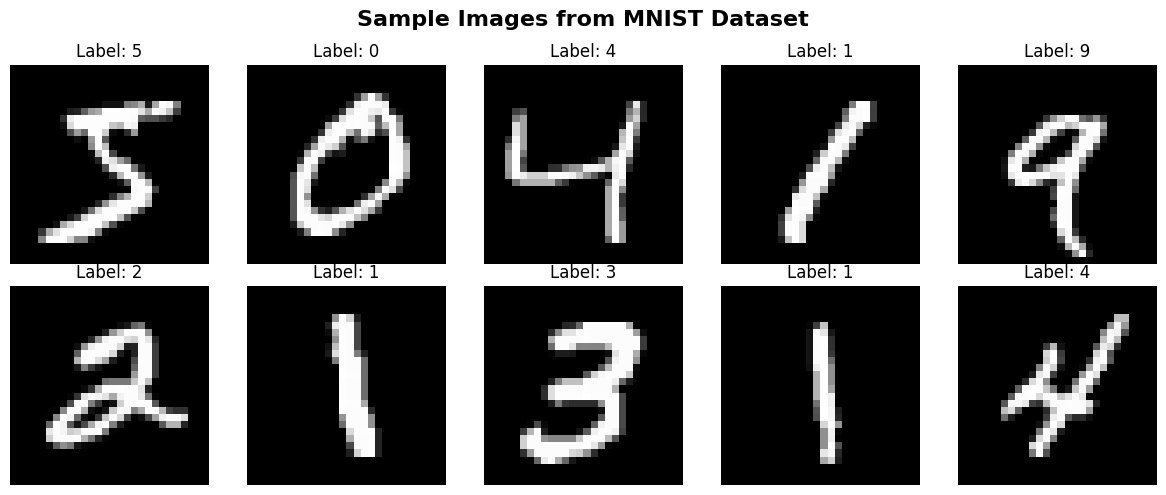

In [3]:
# Visualize some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample Images from MNIST Dataset', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Step 2: Preprocess the Data

Before training, we need to:
1. Reshape images to include the channel dimension (required by Keras)
2. Normalize pixel values to [0, 1] range
3. Convert labels to one-hot encoding

In [4]:
# Reshape images to include channel dimension (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

print(f"Preprocessed training data shape: {X_train.shape}")
print(f"Preprocessed test data shape: {X_test.shape}")
print(f"Training labels shape (one-hot): {y_train_categorical.shape}")
print(f"\nSample one-hot encoded label for digit {y_train[0]}: {y_train_categorical[0]}")

Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed test data shape: (10000, 28, 28, 1)
Training labels shape (one-hot): (60000, 10)

Sample one-hot encoded label for digit 5: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Step 3: Build the CNN Architecture

We'll create a CNN with the following architecture:

1. Conv2D layer (32 filters, 3x3 kernel) + ReLU
2. MaxPooling2D layer (2x2 pool size)
3. Conv2D layer (64 filters, 3x3 kernel) + ReLU
4. MaxPooling2D layer (2x2 pool size)
5. Flatten layer
6. Dense layer (128 neurons) + ReLU
7. Dropout layer (0.5 rate)
8. Output Dense layer (10 neurons) + Softmax

In [5]:
# Build the CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'),
    layers.MaxPooling2D((2, 2), name='pool1'),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2, 2), name='pool2'),
    
    # Flatten and dense layers
    layers.Flatten(name='flatten'),
    layers.Dense(128, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(num_classes, activation='softmax', name='output')
])

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-09 11:58:53.125619: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Display model configuration
print("\nModel Configuration Summary:")
print("="*70)
print(f"Total layers: {len(model.layers)}")
print(f"Trainable parameters: {model.count_params():,}")
print("\nLayer breakdown:")
for i, layer in enumerate(model.layers):
    layer_type = layer.__class__.__name__
    print(f"  {i+1}. {layer.name:15s} ({layer_type})")
print("="*70)


Model Configuration Summary:
Total layers: 8
Trainable parameters: 225,034

Layer breakdown:
  1. conv1           (Conv2D)
  2. pool1           (MaxPooling2D)
  3. conv2           (Conv2D)
  4. pool2           (MaxPooling2D)
  5. flatten         (Flatten)
  6. dense1          (Dense)
  7. dropout         (Dropout)
  8. output          (Dense)


### Step 4: Compile the Model

We need to specify:
- **Optimizer**: Adam (adaptive learning rate optimization)
- **Loss function**: Categorical cross-entropy (for multi-class classification)
- **Metrics**: Accuracy (to monitor during training)

In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")
print(f"Optimizer: Adam")
print(f"Loss function: Categorical Cross-Entropy")
print(f"Metrics: Accuracy")

Model compiled successfully!
Optimizer: Adam
Loss function: Categorical Cross-Entropy
Metrics: Accuracy


### Step 5: Train the Model

Now we train the CNN on our training data. We'll use:
- **Epochs**: 10 (number of times to iterate through the entire dataset)
- **Batch size**: 128 (number of samples per gradient update)
- **Validation split**: 0.1 (10% of training data for validation)

In [8]:
# Train the model
history = model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17:27 2s/step - accuracy: 0.1172 - loss: 2.2870

  5/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1837 - loss: 2.2519 

 10/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2305 - loss: 2.1964

 15/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2728 - loss: 2.1249

 20/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3064 - loss: 2.0490

 25/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3357 - loss: 1.9759

 30/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3626 - loss: 1.9058

 35/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3871 - loss: 1.8397

 40/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4095 - loss: 1.7778

 45/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4301 - loss: 1.7204

 50/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4493 - loss: 1.6668

 55/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4670 - loss: 1.6168

 60/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4832 - loss: 1.5706

 65/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4982 - loss: 1.5276

 70/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5120 - loss: 1.4875

 75/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5249 - loss: 1.4498

 80/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5369 - loss: 1.4145

 85/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5481 - loss: 1.3815

 90/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5586 - loss: 1.3505

 95/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5684 - loss: 1.3213

100/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5777 - loss: 1.2938

105/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5865 - loss: 1.2678

110/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5947 - loss: 1.2433

115/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6025 - loss: 1.2201

120/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6099 - loss: 1.1980

125/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6169 - loss: 1.1771

130/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6236 - loss: 1.1570

135/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6301 - loss: 1.1379

140/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6362 - loss: 1.1196

145/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6421 - loss: 1.1022

150/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6477 - loss: 1.0854

155/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6531 - loss: 1.0694

160/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6582 - loss: 1.0539

165/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6632 - loss: 1.0390

170/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6680 - loss: 1.0247

175/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6726 - loss: 1.0109

180/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6771 - loss: 0.9976

185/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6813 - loss: 0.9848

190/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6855 - loss: 0.9724

195/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6894 - loss: 0.9605

201/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6940 - loss: 0.9466

207/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6985 - loss: 0.9333

212/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7020 - loss: 0.9226

218/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7061 - loss: 0.9102

224/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7101 - loss: 0.8982

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7133 - loss: 0.8886

234/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7164 - loss: 0.8792

240/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7200 - loss: 0.8683

245/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7229 - loss: 0.8595

250/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7258 - loss: 0.8509

256/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7291 - loss: 0.8410

262/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7323 - loss: 0.8313

268/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7354 - loss: 0.8219

273/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7379 - loss: 0.8143

278/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7403 - loss: 0.8069

283/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7427 - loss: 0.7996

288/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7451 - loss: 0.7926

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7473 - loss: 0.7857

298/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7496 - loss: 0.7790

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7517 - loss: 0.7724

308/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7538 - loss: 0.7660

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7559 - loss: 0.7597

318/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7579 - loss: 0.7535

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7599 - loss: 0.7475

328/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7619 - loss: 0.7416

333/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7638 - loss: 0.7359

338/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.7302

343/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7674 - loss: 0.7247

348/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7692 - loss: 0.7193

353/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7710 - loss: 0.7140

358/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7727 - loss: 0.7088

363/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7743 - loss: 0.7038

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7760 - loss: 0.6988

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7776 - loss: 0.6939

379/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7795 - loss: 0.6882

384/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7810 - loss: 0.6836

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7825 - loss: 0.6790

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7840 - loss: 0.6745

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7854 - loss: 0.6701

404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7869 - loss: 0.6658

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7883 - loss: 0.6615

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7896 - loss: 0.6573

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7910 - loss: 0.6532

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9039 - loss: 0.3106 - val_accuracy: 0.9773 - val_loss: 0.0708


Epoch 2/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9375 - loss: 0.1712

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9480 - loss: 0.1421 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9536 - loss: 0.1328

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9562 - loss: 0.1272

 21/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9578 - loss: 0.1239

 27/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9586 - loss: 0.1232

 32/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9592 - loss: 0.1224

 37/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9596 - loss: 0.1216

 42/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9600 - loss: 0.1208

 48/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9605 - loss: 0.1200

 53/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9608 - loss: 0.1196

 59/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9612 - loss: 0.1190

 64/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9615 - loss: 0.1187

 70/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9618 - loss: 0.1183

 76/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9622 - loss: 0.1178

 81/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9624 - loss: 0.1175

 86/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9626 - loss: 0.1171

 91/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9628 - loss: 0.1167

 97/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9630 - loss: 0.1164

102/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9632 - loss: 0.1161

107/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9633 - loss: 0.1159

113/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9634 - loss: 0.1157

118/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9635 - loss: 0.1156

123/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9636 - loss: 0.1154

128/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9637 - loss: 0.1153

133/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9638 - loss: 0.1152

138/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9639 - loss: 0.1151

143/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9640 - loss: 0.1150

148/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9640 - loss: 0.1150

153/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9641 - loss: 0.1149

158/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9642 - loss: 0.1148

163/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9643 - loss: 0.1148

168/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9643 - loss: 0.1147

173/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9644 - loss: 0.1147

178/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9644 - loss: 0.1146

183/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9645 - loss: 0.1145

188/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9646 - loss: 0.1145

193/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9647 - loss: 0.1144

198/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9647 - loss: 0.1143

203/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9648 - loss: 0.1142

208/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9648 - loss: 0.1141

213/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9649 - loss: 0.1140

218/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9649 - loss: 0.1139

223/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9650 - loss: 0.1138

228/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9650 - loss: 0.1137

233/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9651 - loss: 0.1136

238/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9651 - loss: 0.1135

244/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9652 - loss: 0.1134

249/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9653 - loss: 0.1133

255/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9653 - loss: 0.1132

260/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9654 - loss: 0.1131

265/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9654 - loss: 0.1129

270/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9655 - loss: 0.1128

275/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9655 - loss: 0.1127

280/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9656 - loss: 0.1125

285/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9657 - loss: 0.1124

290/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9657 - loss: 0.1123

295/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9658 - loss: 0.1121

300/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9658 - loss: 0.1120

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9659 - loss: 0.1119

310/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9659 - loss: 0.1117

315/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9660 - loss: 0.1116

320/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9660 - loss: 0.1114

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9661 - loss: 0.1113

331/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9661 - loss: 0.1111

336/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9662 - loss: 0.1110

341/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9663 - loss: 0.1108

346/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9663 - loss: 0.1107

352/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9664 - loss: 0.1105

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9664 - loss: 0.1104

362/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9665 - loss: 0.1102

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9665 - loss: 0.1101

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9666 - loss: 0.1099

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9666 - loss: 0.1098

382/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9667 - loss: 0.1097

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9667 - loss: 0.1096

392/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9668 - loss: 0.1094

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9668 - loss: 0.1093

402/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9669 - loss: 0.1092

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9669 - loss: 0.1091

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9669 - loss: 0.1090

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9670 - loss: 0.1088

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9670 - loss: 0.1087

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9705 - loss: 0.0989 - val_accuracy: 0.9868 - val_loss: 0.0442


Epoch 3/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9766 - loss: 0.0824

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9870 - loss: 0.0586 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9860 - loss: 0.0575

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9847 - loss: 0.0599

 21/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9836 - loss: 0.0619

 26/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9828 - loss: 0.0640

 31/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9822 - loss: 0.0660

 36/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9818 - loss: 0.0674

 41/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9814 - loss: 0.0684

 46/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9811 - loss: 0.0688

 51/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9809 - loss: 0.0693

 56/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9807 - loss: 0.0696

 62/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9804 - loss: 0.0700

 67/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9802 - loss: 0.0704

 72/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9800 - loss: 0.0707

 77/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9798 - loss: 0.0710

 82/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9796 - loss: 0.0713

 87/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9794 - loss: 0.0715

 92/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9793 - loss: 0.0718

 97/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9792 - loss: 0.0720

103/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9790 - loss: 0.0724

109/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9789 - loss: 0.0727

114/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9788 - loss: 0.0729

119/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9786 - loss: 0.0732

124/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9785 - loss: 0.0734

129/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9784 - loss: 0.0736

135/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9783 - loss: 0.0738

140/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9783 - loss: 0.0740

145/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9782 - loss: 0.0741

150/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9781 - loss: 0.0743

155/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9781 - loss: 0.0744

160/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9780 - loss: 0.0745

165/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9780 - loss: 0.0746

170/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9779 - loss: 0.0747

175/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9778 - loss: 0.0748

180/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9778 - loss: 0.0749

185/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9777 - loss: 0.0750

190/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9777 - loss: 0.0751

196/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9776 - loss: 0.0752

201/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9776 - loss: 0.0752

206/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9775 - loss: 0.0753

211/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9775 - loss: 0.0754

217/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9775 - loss: 0.0754

222/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9774 - loss: 0.0755

228/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9774 - loss: 0.0756

233/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9774 - loss: 0.0756

238/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9774 - loss: 0.0756

244/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9774 - loss: 0.0757

249/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

254/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

259/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

264/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

269/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

274/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

279/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

284/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

289/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

294/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

299/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0757

304/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0756

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0756

314/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0756

319/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9773 - loss: 0.0755

324/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9774 - loss: 0.0755

330/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0755

336/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0754

341/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0754

346/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0753

352/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0753

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0753

363/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0752

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9774 - loss: 0.0752

374/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0751

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0751

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0750

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0750

395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0750

400/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0749

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0749

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0749

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0748

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.0748

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9782 - loss: 0.0718 - val_accuracy: 0.9875 - val_loss: 0.0424


Epoch 4/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9844 - loss: 0.0960

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9879 - loss: 0.0587 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9886 - loss: 0.0520

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9884 - loss: 0.0523

 21/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9879 - loss: 0.0526

 26/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9872 - loss: 0.0536

 31/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9866 - loss: 0.0545

 36/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9859 - loss: 0.0556

 41/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9855 - loss: 0.0565

 46/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9853 - loss: 0.0570

 51/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9851 - loss: 0.0575

 56/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9849 - loss: 0.0580

 61/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9847 - loss: 0.0584

 66/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9845 - loss: 0.0587

 71/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9843 - loss: 0.0591

 76/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9841 - loss: 0.0593

 81/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9840 - loss: 0.0595

 86/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9839 - loss: 0.0596

 92/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9837 - loss: 0.0597

 98/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9836 - loss: 0.0600

104/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9834 - loss: 0.0601

110/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9833 - loss: 0.0603

116/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9832 - loss: 0.0604

122/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9831 - loss: 0.0604

128/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9830 - loss: 0.0605

134/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9830 - loss: 0.0605

139/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9829 - loss: 0.0606

144/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9829 - loss: 0.0607

149/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9828 - loss: 0.0607

154/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9828 - loss: 0.0607

159/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9827 - loss: 0.0608

164/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9827 - loss: 0.0608

169/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9827 - loss: 0.0608

175/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9826 - loss: 0.0609

180/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9826 - loss: 0.0609

186/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9826 - loss: 0.0610

191/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9826 - loss: 0.0610

196/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9825 - loss: 0.0611

201/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9825 - loss: 0.0611

206/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9825 - loss: 0.0612

211/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9825 - loss: 0.0613

216/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9824 - loss: 0.0613

222/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9824 - loss: 0.0614

228/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9824 - loss: 0.0614

234/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9824 - loss: 0.0614

240/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9824 - loss: 0.0614

245/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9824 - loss: 0.0615

250/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

255/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

260/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

265/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

270/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

275/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

281/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9823 - loss: 0.0615

287/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0615

292/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0615

298/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0615

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0615

308/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0615

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0614

318/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0614

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0614

329/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0614

334/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0614

339/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0614

344/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0613

349/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0613

354/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0613

359/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0613

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0612

370/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0612

375/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0612

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0612

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0612

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0611

395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0611

400/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0611

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0611

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0611

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0611

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.0610

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9822 - loss: 0.0594 - val_accuracy: 0.9898 - val_loss: 0.0393


Epoch 5/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9922 - loss: 0.0424

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9882 - loss: 0.0376 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9879 - loss: 0.0356

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9877 - loss: 0.0359

 21/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9875 - loss: 0.0365

 26/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9873 - loss: 0.0379

 32/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9871 - loss: 0.0392

 37/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9869 - loss: 0.0398

 42/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9867 - loss: 0.0404

 47/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9866 - loss: 0.0407

 52/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9865 - loss: 0.0411

 57/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9865 - loss: 0.0414

 62/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9864 - loss: 0.0418

 67/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9863 - loss: 0.0422

 72/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9863 - loss: 0.0425

 77/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9862 - loss: 0.0427

 82/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9862 - loss: 0.0429

 87/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9861 - loss: 0.0431

 92/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9861 - loss: 0.0433

 97/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9861 - loss: 0.0435

102/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9860 - loss: 0.0437

107/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9859 - loss: 0.0439

112/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9859 - loss: 0.0441

117/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9858 - loss: 0.0443

122/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9858 - loss: 0.0445

127/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9857 - loss: 0.0447

132/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9856 - loss: 0.0449

137/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9856 - loss: 0.0451

142/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9856 - loss: 0.0453

147/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9855 - loss: 0.0454

152/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9855 - loss: 0.0456

157/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9854 - loss: 0.0457

162/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9854 - loss: 0.0459

167/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9854 - loss: 0.0460

172/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9853 - loss: 0.0462

177/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9853 - loss: 0.0463

182/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9853 - loss: 0.0465

187/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9852 - loss: 0.0466

192/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9852 - loss: 0.0467

197/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9852 - loss: 0.0468

202/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9851 - loss: 0.0469

207/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9851 - loss: 0.0470

212/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9851 - loss: 0.0471

217/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9851 - loss: 0.0472

222/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9850 - loss: 0.0473

227/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9850 - loss: 0.0474

232/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9850 - loss: 0.0475

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9850 - loss: 0.0476

242/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9850 - loss: 0.0477

247/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0477

253/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0478

259/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0479

265/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0480

271/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0480

276/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0480

281/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0481

286/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0481

291/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0482

296/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0482

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0483

306/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0483

312/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0483

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9848 - loss: 0.0484

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9848 - loss: 0.0484

329/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0484

334/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0484

340/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0485

346/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0485

351/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0485

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0486

362/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0486

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0486

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0486

378/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0486

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0487

388/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0487

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0487

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0488

404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0488

410/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0488

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0488

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9848 - loss: 0.0489

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9846 - loss: 0.0506 - val_accuracy: 0.9903 - val_loss: 0.0349


Epoch 6/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9766 - loss: 0.0746

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9889 - loss: 0.0436 

 12/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9892 - loss: 0.0410

 18/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9891 - loss: 0.0396

 23/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9890 - loss: 0.0389

 28/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9886 - loss: 0.0393

 33/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9883 - loss: 0.0397

 38/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9879 - loss: 0.0402

 43/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9878 - loss: 0.0404

 48/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9877 - loss: 0.0405

 53/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9876 - loss: 0.0407

 59/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9875 - loss: 0.0409

 65/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9874 - loss: 0.0411

 70/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9874 - loss: 0.0413

 76/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9873 - loss: 0.0414

 81/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9873 - loss: 0.0414

 87/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9873 - loss: 0.0415

 92/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9873 - loss: 0.0416

 98/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9872 - loss: 0.0417

103/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9872 - loss: 0.0418

108/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9872 - loss: 0.0418

113/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0419

118/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0419

123/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0420

128/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0421

133/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9871 - loss: 0.0422

138/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9870 - loss: 0.0422

143/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9870 - loss: 0.0423

148/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9870 - loss: 0.0423

153/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9870 - loss: 0.0424

158/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9870 - loss: 0.0424

163/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9870 - loss: 0.0425

168/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0425

173/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0425

178/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0425

183/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0426

188/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0426

193/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0426

198/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9868 - loss: 0.0427

203/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9868 - loss: 0.0427

208/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9868 - loss: 0.0427

213/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9868 - loss: 0.0428

218/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9867 - loss: 0.0428

223/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9867 - loss: 0.0428

228/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9867 - loss: 0.0429

233/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9867 - loss: 0.0429

238/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9867 - loss: 0.0429

243/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9867 - loss: 0.0430

248/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0430

253/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0430

259/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0430

265/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0431

270/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0431

275/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0431

280/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

285/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

290/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

295/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

300/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

310/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

315/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

320/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0431

330/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

335/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

340/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

345/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

350/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

356/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

362/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

382/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

403/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9864 - loss: 0.0431

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9863 - loss: 0.0431

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9859 - loss: 0.0435 - val_accuracy: 0.9895 - val_loss: 0.0369


Epoch 7/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9922 - loss: 0.0272

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9935 - loss: 0.0210 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9929 - loss: 0.0220

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9925 - loss: 0.0242

 22/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9922 - loss: 0.0262

 27/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9917 - loss: 0.0282

 33/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9911 - loss: 0.0300

 38/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9905 - loss: 0.0316

 43/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9902 - loss: 0.0327

 48/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9899 - loss: 0.0336

 53/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9897 - loss: 0.0344

 58/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9895 - loss: 0.0349

 63/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9894 - loss: 0.0353

 68/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9893 - loss: 0.0358

 73/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9892 - loss: 0.0361

 78/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9891 - loss: 0.0363

 83/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9891 - loss: 0.0365

 88/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9890 - loss: 0.0366

 94/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9890 - loss: 0.0367

 99/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9889 - loss: 0.0369

104/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9889 - loss: 0.0371

109/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0372

114/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0373

119/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9887 - loss: 0.0375

124/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9887 - loss: 0.0376

129/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9886 - loss: 0.0377

134/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9886 - loss: 0.0379

139/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9885 - loss: 0.0380

144/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9885 - loss: 0.0381

149/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9885 - loss: 0.0382

154/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9884 - loss: 0.0383

159/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9884 - loss: 0.0384

164/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9884 - loss: 0.0384

169/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9883 - loss: 0.0385

174/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9883 - loss: 0.0386

180/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9883 - loss: 0.0387

185/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9883 - loss: 0.0387

191/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9882 - loss: 0.0388

196/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9882 - loss: 0.0389

201/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9882 - loss: 0.0389

206/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9881 - loss: 0.0390

211/422 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9881 - loss: 0.0391

216/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9881 - loss: 0.0391

222/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9881 - loss: 0.0391

227/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9881 - loss: 0.0392

232/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9881 - loss: 0.0392

237/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9880 - loss: 0.0392

242/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9880 - loss: 0.0392

247/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

252/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

257/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

262/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

267/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

272/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

277/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

282/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

287/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

292/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9880 - loss: 0.0393

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

302/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

307/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

312/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

322/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

327/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9879 - loss: 0.0392

332/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0392

337/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0392

342/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0391

348/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0391

353/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0391

358/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0391

363/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0391

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

378/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

388/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

398/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

403/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0390

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9877 - loss: 0.0386 - val_accuracy: 0.9918 - val_loss: 0.0324


Epoch 8/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 1.0000 - loss: 0.0087

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9979 - loss: 0.0123 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9969 - loss: 0.0137

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9959 - loss: 0.0154

 22/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9947 - loss: 0.0178

 28/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9937 - loss: 0.0204

 34/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9931 - loss: 0.0221

 39/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9927 - loss: 0.0236

 44/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9924 - loss: 0.0246

 49/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9921 - loss: 0.0255

 54/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9919 - loss: 0.0263

 59/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0270

 64/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9915 - loss: 0.0276

 69/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9914 - loss: 0.0282

 74/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9912 - loss: 0.0286

 79/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9911 - loss: 0.0290

 84/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9910 - loss: 0.0293

 89/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9910 - loss: 0.0295

 94/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9909 - loss: 0.0298

100/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9908 - loss: 0.0301

106/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9907 - loss: 0.0304

112/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9906 - loss: 0.0307

117/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9905 - loss: 0.0308

122/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9905 - loss: 0.0310

127/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9904 - loss: 0.0312

132/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9904 - loss: 0.0313

138/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9903 - loss: 0.0315

143/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9903 - loss: 0.0317

148/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9902 - loss: 0.0318

153/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9902 - loss: 0.0319

158/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9902 - loss: 0.0320

163/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9901 - loss: 0.0321

168/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9901 - loss: 0.0322

174/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9901 - loss: 0.0323

180/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9901 - loss: 0.0324

185/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9901 - loss: 0.0324

190/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9900 - loss: 0.0325

195/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9900 - loss: 0.0326

200/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9900 - loss: 0.0327

205/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9900 - loss: 0.0327

210/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9900 - loss: 0.0328

215/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9899 - loss: 0.0329

220/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9899 - loss: 0.0329

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9899 - loss: 0.0330

231/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9899 - loss: 0.0330

236/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9899 - loss: 0.0331

241/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9899 - loss: 0.0331

246/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9899 - loss: 0.0332

251/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0332

256/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0332

261/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0333

266/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0333

271/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0333

276/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0334

281/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0334

286/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0334

291/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0334

296/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9898 - loss: 0.0334

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9897 - loss: 0.0334

306/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9897 - loss: 0.0335

311/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9897 - loss: 0.0335

316/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9897 - loss: 0.0335

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9897 - loss: 0.0335

326/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9897 - loss: 0.0335

331/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

336/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

341/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

346/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

351/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

355/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

359/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

378/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

382/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

391/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

396/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

400/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.0335

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9896 - loss: 0.0337 - val_accuracy: 0.9917 - val_loss: 0.0329


Epoch 9/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9688 - loss: 0.0839

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9860 - loss: 0.0426 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9898 - loss: 0.0327

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9912 - loss: 0.0297

 21/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9918 - loss: 0.0284

 26/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9920 - loss: 0.0278

 31/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9920 - loss: 0.0277

 36/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0278

 41/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9918 - loss: 0.0278

 46/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9918 - loss: 0.0279

 51/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0280

 56/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0280

 61/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0281

 66/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0281

 70/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0282

 75/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0282

 79/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0281

 84/422 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0281

 89/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9919 - loss: 0.0281

 94/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9919 - loss: 0.0282

 99/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9919 - loss: 0.0283

104/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9919 - loss: 0.0283

109/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0284

114/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0284

118/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0284

123/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0285

127/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0285

132/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0285

137/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0285

142/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0285

147/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0285

152/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0286

157/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0286

162/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0286

167/422 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0286

172/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

177/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

182/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

187/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

192/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

197/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

202/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

207/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

212/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9917 - loss: 0.0286

217/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9916 - loss: 0.0286

222/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9916 - loss: 0.0286

227/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9916 - loss: 0.0287

232/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9916 - loss: 0.0287

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9916 - loss: 0.0287

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9916 - loss: 0.0287

246/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9915 - loss: 0.0287

251/422 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9915 - loss: 0.0288

256/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

262/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

267/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

272/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

277/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

282/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

287/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

292/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

298/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9915 - loss: 0.0288

303/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.0288

308/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.0289

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.0289

319/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.0289

324/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.0289

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.0289

334/422 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9914 - loss: 0.0289

339/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9914 - loss: 0.0289

344/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9914 - loss: 0.0289

349/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9914 - loss: 0.0289

354/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0289

359/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0289

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0289

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0289

374/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0289

379/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0289

384/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

394/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9913 - loss: 0.0290

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9907 - loss: 0.0300 - val_accuracy: 0.9918 - val_loss: 0.0351


Epoch 10/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9766 - loss: 0.0544

  6/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9891 - loss: 0.0294 

 11/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9902 - loss: 0.0273

 16/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9908 - loss: 0.0259

 21/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9912 - loss: 0.0255

 26/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9915 - loss: 0.0251

 31/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9916 - loss: 0.0251

 36/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9916 - loss: 0.0251

 41/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9916 - loss: 0.0252

 46/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9917 - loss: 0.0250

 51/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0250

 56/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0250

 61/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9917 - loss: 0.0250

 66/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9917 - loss: 0.0250

 71/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9917 - loss: 0.0251

 76/422 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9917 - loss: 0.0251

 81/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

 86/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

 91/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

 96/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

101/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

106/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

112/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

117/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

122/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0251

127/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0252

132/422 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0253

137/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9917 - loss: 0.0253

142/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0254

147/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0255

152/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0255

157/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0256

162/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0256

167/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0257

172/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0257

178/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0258

184/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9916 - loss: 0.0259

189/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9915 - loss: 0.0259

195/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9915 - loss: 0.0260

201/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9915 - loss: 0.0260

206/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9915 - loss: 0.0261

211/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9915 - loss: 0.0261

217/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9914 - loss: 0.0261

222/422 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9914 - loss: 0.0262

228/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - loss: 0.0262

234/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - loss: 0.0263

240/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - loss: 0.0263

246/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - loss: 0.0264

251/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - loss: 0.0264

256/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0265

261/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0265

266/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0265

271/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0266

277/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0266

283/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0266

288/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0266

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0267

299/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0267

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0267

311/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0267

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0268

323/422 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.0268

329/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

335/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

341/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

347/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

352/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

362/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

367/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

378/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0268

384/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

390/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

396/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0269

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9917 - val_loss: 0.0325



Training completed!


### Step 6: Visualize Training History

Plotting the training and validation metrics helps us understand how well our model learned and whether it's overfitting.

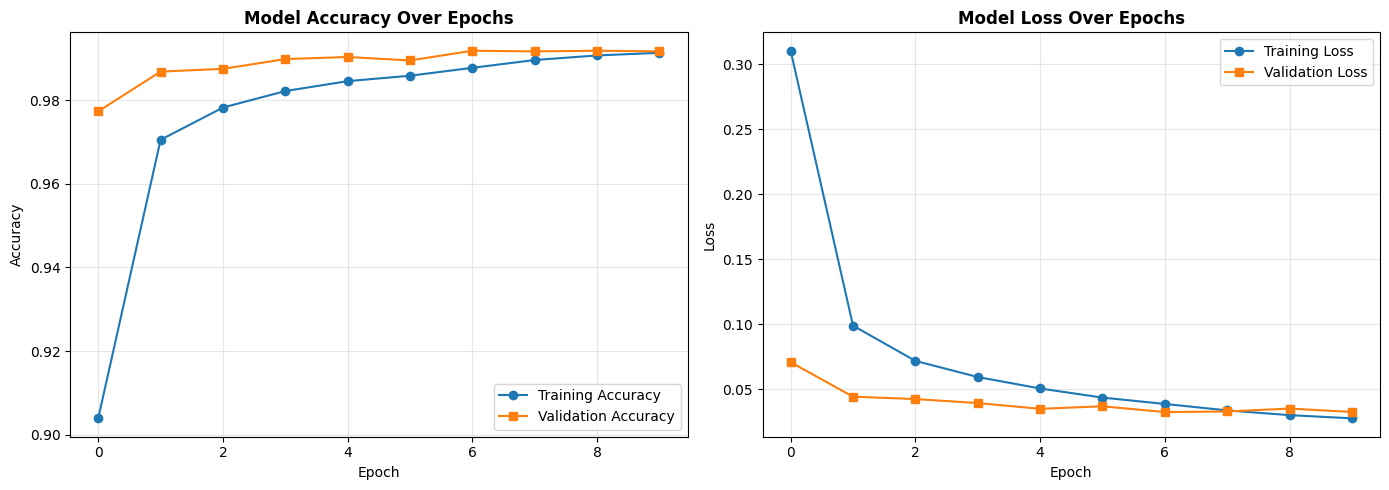


Final Training Accuracy: 0.9913
Final Validation Accuracy: 0.9917
Final Training Loss: 0.0276
Final Validation Loss: 0.0325


In [9]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy Over Epochs', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss Over Epochs', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

### Step 7: Evaluate on Test Set

The true test of our model is its performance on unseen data.

In [10]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on test set
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"\nPredictions shape: {y_pred.shape}")
print(f"Sample predictions: {y_pred[:10]}")
print(f"Actual labels:      {y_test[:10]}")

Test Accuracy: 0.9915 (99.15%)
Test Loss: 0.0246



Predictions shape: (10000,)
Sample predictions: [7 2 1 0 4 1 4 9 5 9]
Actual labels:      [7 2 1 0 4 1 4 9 5 9]


### Step 8: Confusion Matrix and Classification Report

These metrics provide deeper insights into model performance across different classes.

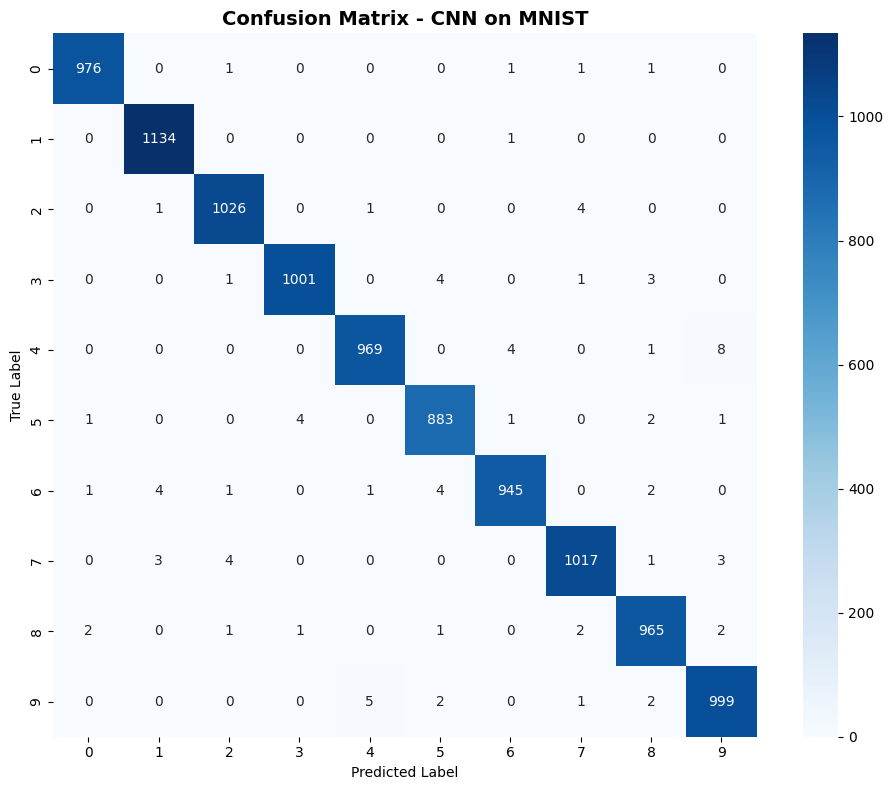


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [11]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - CNN on MNIST', fontweight='bold', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print("="*70)
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

### Step 9: Visualize Predictions

Let's look at some correct and incorrect predictions to understand our model's behavior.

Number of correct predictions: 9915
Number of incorrect predictions: 85


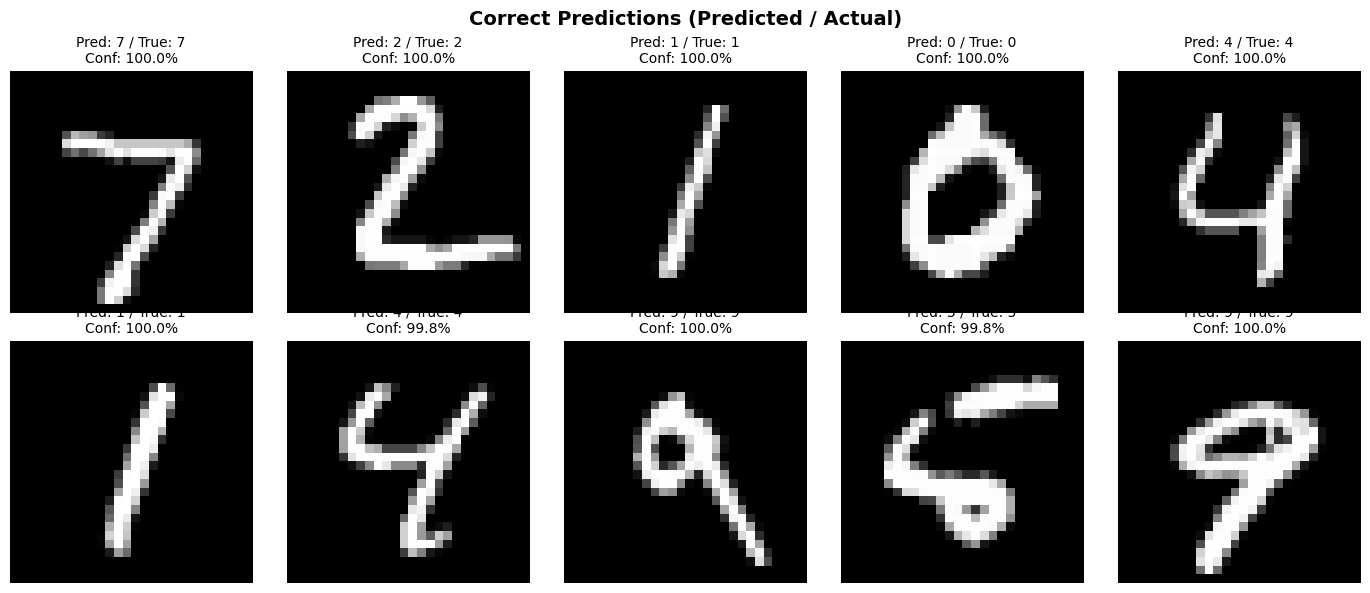

In [12]:
# Find correct and incorrect predictions
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"Number of correct predictions: {len(correct_indices)}")
print(f"Number of incorrect predictions: {len(incorrect_indices)}")

# Visualize some correct predictions
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
fig.suptitle('Correct Predictions (Predicted / Actual)', fontsize=14, fontweight='bold')

for i, ax in enumerate(axes.flat):
    idx = correct_indices[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    confidence = y_pred_probs[idx][y_pred[idx]] * 100
    ax.set_title(f'Pred: {y_pred[idx]} / True: {y_test[idx]}\nConf: {confidence:.1f}%', 
                 fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

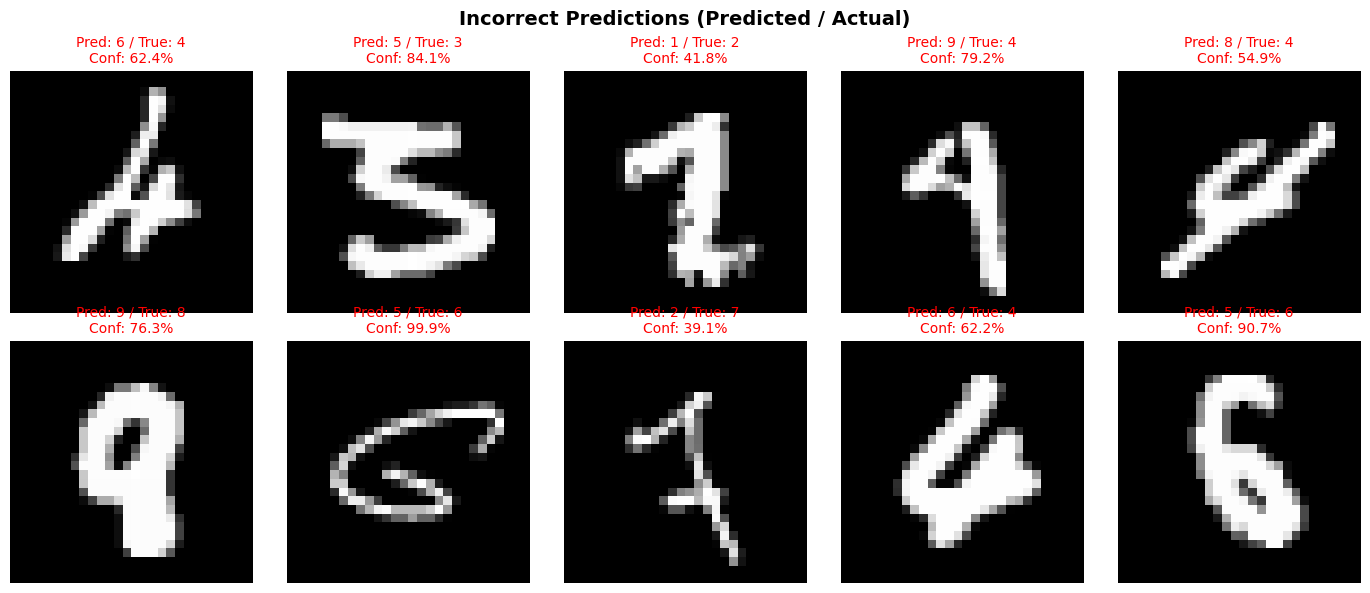

In [13]:
# Visualize some incorrect predictions
if len(incorrect_indices) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    fig.suptitle('Incorrect Predictions (Predicted / Actual)', fontsize=14, fontweight='bold')
    
    num_to_show = min(10, len(incorrect_indices))
    for i, ax in enumerate(axes.flat[:num_to_show]):
        idx = incorrect_indices[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        confidence = y_pred_probs[idx][y_pred[idx]] * 100
        ax.set_title(f'Pred: {y_pred[idx]} / True: {y_test[idx]}\nConf: {confidence:.1f}%', 
                     fontsize=10, color='red')
        ax.axis('off')
    
    # Hide unused subplots if there are fewer than 10 incorrect predictions
    for i in range(num_to_show, 10):
        axes.flat[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Perfect predictions! No errors to display.")

### Step 10: Visualize Learned Filters

Let's examine what features the first convolutional layer has learned to detect.

Filters shape: (3, 3, 1, 32)
Number of filters: 32
Filter size: 3x3


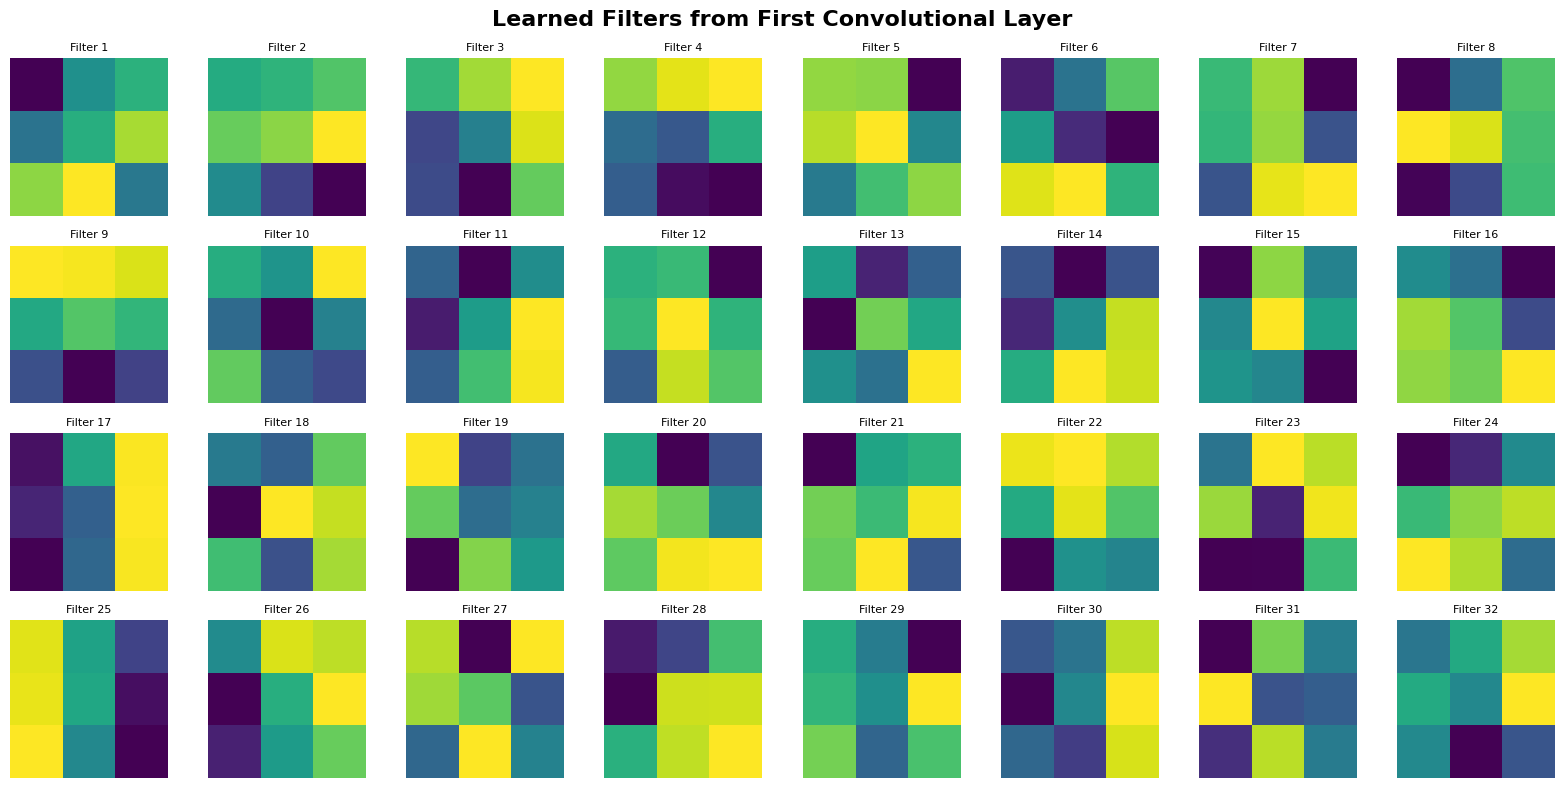

In [14]:
# Get the weights of the first convolutional layer
first_conv_layer = model.layers[0]
filters, biases = first_conv_layer.get_weights()

print(f"Filters shape: {filters.shape}")  # (3, 3, 1, 32) - 32 filters of size 3x3
print(f"Number of filters: {filters.shape[-1]}")
print(f"Filter size: {filters.shape[0]}x{filters.shape[1]}")

# Normalize filters for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Plot the filters
n_filters = 32
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Learned Filters from First Convolutional Layer', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    if i < n_filters:
        # Get the filter
        f = filters_normalized[:, :, 0, i]
        ax.imshow(f, cmap='viridis')
        ax.set_title(f'Filter {i+1}', fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Step 11: Understanding Model Performance

Our CNN has learned to classify handwritten digits with high accuracy. The filters in the first layer detect basic features like edges and curves, while deeper layers combine these to recognize more complex patterns.

The dropout layer helps prevent overfitting by randomly deactivating neurons during training, forcing the network to learn more robust features.

### Model Architecture Benefits

Key advantages of our CNN architecture:

- **Convolutional layers** automatically learn relevant features from raw pixels
- **Pooling layers** reduce dimensionality while preserving important information
- **Hierarchical learning** allows the network to build complex representations from simple features
- **Dropout regularization** prevents overfitting and improves generalization

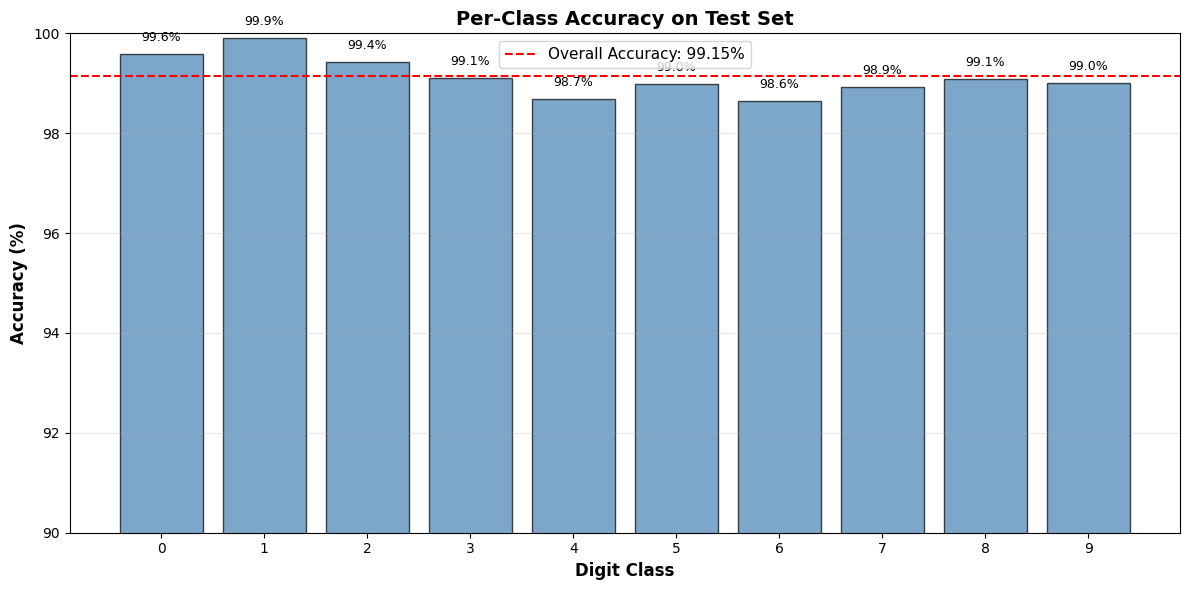


Per-Class Accuracy:
Digit 0: 99.59%
Digit 1: 99.91%
Digit 2: 99.42%
Digit 3: 99.11%
Digit 4: 98.68%
Digit 5: 98.99%
Digit 6: 98.64%
Digit 7: 98.93%
Digit 8: 99.08%
Digit 9: 99.01%
Best performing digit: 1
Worst performing digit: 6


In [15]:
# Analyze per-class accuracy
from collections import Counter

# Calculate per-class accuracy
class_accuracy = {}
for digit in range(10):
    digit_indices = np.where(y_test == digit)[0]
    digit_predictions = y_pred[digit_indices]
    digit_true = y_test[digit_indices]
    accuracy = np.sum(digit_predictions == digit_true) / len(digit_true)
    class_accuracy[digit] = accuracy

# Visualize per-class accuracy
plt.figure(figsize=(12, 6))
digits = list(class_accuracy.keys())
accuracies = [class_accuracy[d] * 100 for d in digits]

bars = plt.bar(digits, accuracies, color='steelblue', alpha=0.7, edgecolor='black')
plt.axhline(y=test_accuracy*100, color='red', linestyle='--', label=f'Overall Accuracy: {test_accuracy*100:.2f}%')
plt.xlabel('Digit Class', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Per-Class Accuracy on Test Set', fontsize=14, fontweight='bold')
plt.xticks(digits)
plt.ylim([90, 100])
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print statistics
print("\nPer-Class Accuracy:")
print("="*40)
for digit in range(10):
    print(f"Digit {digit}: {class_accuracy[digit]*100:.2f}%")
print("="*40)
print(f"Best performing digit: {max(class_accuracy, key=class_accuracy.get)}")
print(f"Worst performing digit: {min(class_accuracy, key=class_accuracy.get)}")

## Hands-On Activity: Experiment with CNN Architecture

Now it's your turn to experiment! Try modifying the CNN architecture and observe how it affects performance. Here are some ideas:

### Suggested Experiments:

1. **Add more convolutional layers**: Add a third Conv2D + MaxPooling block
2. **Change filter sizes**: Try different kernel sizes (5x5 instead of 3x3)
3. **Modify the number of filters**: Increase or decrease the number of filters in each layer
4. **Adjust dropout rate**: Try different dropout values (0.3, 0.7)
5. **Change optimizer**: Try 'sgd' or 'rmsprop' instead of 'adam'
6. **Modify batch size and epochs**: Experiment with different training parameters

### Template for Experimentation:

In [16]:
# Build your experimental CNN model here
experimental_model = models.Sequential([
    # TODO: Build your own architecture
    # Example: Add a third convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Try adding a third block here
    # layers.Conv2D(128, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile your model
experimental_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the architecture
experimental_model.summary()

# Train your model (uncomment to run)
# experimental_history = experimental_model.fit(
#     X_train, y_train_categorical,
#     epochs=10,
#     batch_size=128,
#     validation_split=0.1,
#     verbose=1
# )

# Evaluate your model (uncomment to run)
# test_loss, test_accuracy = experimental_model.evaluate(X_test, y_test_categorical)
# print(f"Experimental Model Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Key Takeaways

Congratulations on completing Day 53! Here are the key concepts you should remember:

- **CNN Architecture**: CNNs consist of convolutional layers (feature extraction), pooling layers (dimensionality reduction), and dense layers (classification)

- **Data Preprocessing**: Proper preprocessing (normalization, reshaping, one-hot encoding) is crucial for CNN performance

- **Training Process**: Monitor both training and validation metrics to detect overfitting and ensure good generalization

- **Model Evaluation**: Use multiple metrics (accuracy, confusion matrix, classification report) to thoroughly assess model performance

- **Feature Learning**: CNNs automatically learn hierarchical features from raw pixels, from simple edges to complex patterns

- **Hyperparameter Impact**: Architecture choices (number of layers, filters, kernel sizes) and training parameters (learning rate, batch size, epochs) significantly affect results

- **Visualization**: Examining learned filters and feature maps provides insights into what the network has learned and helps debug issues

## Further Resources

To deepen your understanding of CNNs and image classification, explore these resources:

### Documentation and Tutorials:
- [TensorFlow/Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn) - Official TensorFlow guide for building CNNs
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) - Stanford's excellent course on CNNs
- [Deep Learning Book - Chapter 9: Convolutional Networks](https://www.deeplearningbook.org/contents/convnets.html) - Comprehensive theoretical foundation

### Research Papers:
- [ImageNet Classification with Deep Convolutional Neural Networks (AlexNet)](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) - The paper that revolutionized computer vision
- [Very Deep Convolutional Networks for Large-Scale Image Recognition (VGG)](https://arxiv.org/abs/1409.1556) - Introduction to deep CNN architectures
- [Deep Residual Learning for Image Recognition (ResNet)](https://arxiv.org/abs/1512.03385) - Breakthrough in training very deep networks

### Datasets for Practice:
- [CIFAR-10/CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) - More challenging image classification datasets
- [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) - Drop-in replacement for MNIST with clothing images
- [ImageNet](https://www.image-net.org/) - Large-scale image database used in research

### Interactive Tools:
- [CNN Explainer](https://poloclub.github.io/cnn-explainer/) - Interactive visualization of how CNNs work
- [TensorFlow Playground](https://playground.tensorflow.org/) - Visualize neural network training in real-time